In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import yfinance as yf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score, cross_validate
import math
from numpy import mean, std, sqrt
#from pycaret.regression import *
import torch
import torch.nn as nn
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
time_start = datetime.now()

In [ ]:
## setting the start and end date
start_date = '2000-01-01'
end_date = datetime.today()

## Data Preprocessing

In [ ]:
# Define the currency pair symbol for GBP to BDT
currency_pair = 'USDBDT=X'
# Fetch exchange rate data from Yahoo Finance
data = yf.download(currency_pair, start=start_date, end=end_date)
# Display the fetched data
print(data)

data = data.reset_index()

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2002-04-01   57.250000   57.500000   57.000000   57.250000   57.250000       0
2003-01-02   57.900002   58.150002   57.650002   57.900002   57.900002       0
2003-04-21   58.200001   58.450001   57.950001   58.200001   58.200001       0
2003-12-01   56.612000   56.612000   56.612000   56.612000   56.612000       0
2003-12-02   56.706001   56.706001   56.706001   56.706001   56.706001       0
...                ...         ...         ...         ...         ...     ...
2024-04-09  107.829597  108.107857  107.829597  107.803284  107.803284       0
2024-04-10  108.219368  108.219368  108.219368  108.107857  108.107857       0
2024-04-11  109.330055  109.330055  108.065796  108.219368  108.219368       0
2024-04-12  108.109116  108.109116  108.002815  108.065796  108.065796       0
2024-04-13  109.610001  109.949997  109.019997  109.

In [ ]:
data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,5302,5302.000000,5302.000000,5302.000000,5302.000000,5302.000000,5302.0
mean,2014-02-09 12:41:00.656356096,76.759467,76.937620,76.646835,76.757641,76.757641,0.0
min,2002-04-01 00:00:00,56.456001,56.456001,56.456001,56.456001,56.456001,0.0
25%,2009-01-07 06:00:00,67.662003,67.699997,67.617748,67.653000,67.653000,0.0
50%,2014-02-11 12:00:00,76.495502,76.563499,76.357002,76.405499,76.405499,0.0
75%,2019-03-14 18:00:00,82.815750,83.084064,82.747877,82.908247,82.908247,0.0
max,2024-04-13 00:00:00,109.610001,109.949997,109.160988,109.949997,109.949997,0.0
std,NaN,11.424711,11.504921,11.379904,11.425989,11.425989,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5302 entries, 0 to 5301
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5302 non-null   datetime64[ns]
 1   Open       5302 non-null   float64       
 2   High       5302 non-null   float64       
 3   Low        5302 non-null   float64       
 4   Close      5302 non-null   float64       
 5   Adj Close  5302 non-null   float64       
 6   Volume     5302 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 290.1 KB


## Data Visualization

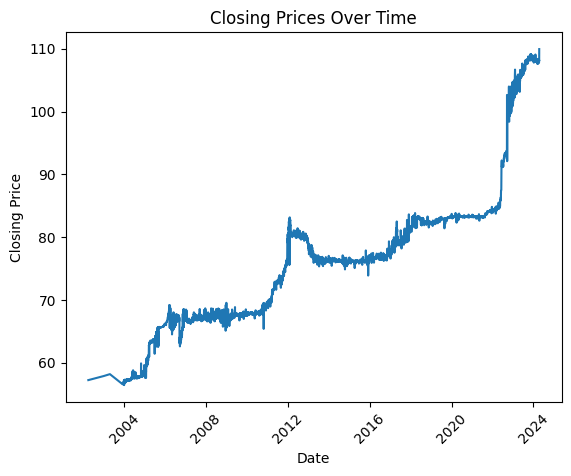

In [ ]:
# Plotting the closing prices
plt.plot(data['Date'] ,data['Close'])
plt.title("Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
#plt.xticks([])
plt.xticks(rotation=45)
plt.savefig('GBP to Bangtaka closing price')
plt.show()

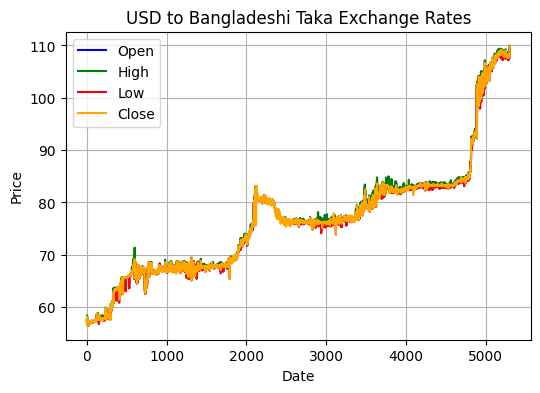

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(data.index, data['Open'], label='Open', color='blue')
plt.plot(data.index, data['High'], label='High', color='green')
plt.plot(data.index, data['Low'], label='Low', color='red')
plt.plot(data.index, data['Close'], label='Close', color='orange')

plt.title('USD to Bangladeshi Taka Exchange Rates')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

## Splitting of data

In [ ]:
# Defining dataset for training, test and validation
feature_data_set = data

train_data_size = int(len(feature_data_set) * 0.80)  ## 80% dataset for training ##
test_data_size = int(len(feature_data_set) * 0.10)   ## 10% dataset for training ##
val_data_size = len(feature_data_set) - train_data_size - test_data_size  ## Validation dataset ##

# Split the data into training, testing, and validation sets
train_data = feature_data_set.iloc[:train_data_size]
validation_data = feature_data_set.iloc[train_data_size: train_data_size + test_data_size]
test_data = feature_data_set.iloc[train_data_size + val_data_size:]

# Print the shapes of the split sets
print(train_data.shape, validation_data.shape, test_data.shape)

(4241, 7) (530, 7) (530, 7)


In [ ]:
train_filter_data = train_data.filter(['Adj Close'])
train_data_set = train_filter_data.values

test__filter_data = test_data.filter(['Adj Close'])
test_data_set = test__filter_data.values

validation_filter_data = validation_data.filter(['Adj Close'])
validation_data_set = validation_filter_data.values

train_data_set.shape, test_data_set.shape, validation_data_set.shape

((4241, 1), (530, 1), (530, 1))

In [ ]:
## scaling of data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

Scaled_train_data_set = scaler.fit_transform(train_data_set)
Scaled_val_data_set = scaler.fit_transform(validation_data_set)
Scaled_test_data_set = scaler.fit_transform(test_data_set)

In [ ]:
## data spliting into x and y train
X_train = []
y_train = []

step_index = 30

for index in range(len(train_data) - step_index):
    X_train.append(Scaled_train_data_set[index:index + step_index, 0])
    y_train.append(Scaled_train_data_set[step_index + index, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Convert to NumPy array
X_train = np.array(X_train)
y_train = np.array(y_train)

# Reshape the input data to match deep learning models
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = y_train.reshape(y_train.shape[0],1)

# Print the reshaped data
print(X_train.shape , y_train.shape)

(4211, 30, 1) (4211, 1)


In [ ]:
## data spliting into x and y validate
X_Val = []
y_Val = []

for index in range(len(validation_data)-step_index):
    X_Val.append(Scaled_val_data_set[index : index + step_index, 0])
    y_Val.append(Scaled_val_data_set[step_index + index, 0])

X_Val, y_Val = np.array(X_Val), np.array(y_Val)

# Covert to NumPy array
X_Val = np.array(X_Val)
y_Val = np.array(y_Val)

# Reshaped input data to match with deep learning model
y_Val = y_Val.reshape(y_Val.shape[0] , 1)
X_Val = np.reshape(X_Val, (X_Val.shape[0], X_Val.shape[1], 1))

# Print the reshaped data
print(X_Val.shape, y_Val.shape)

(500, 30, 1) (500, 1)


In [ ]:
## data spliting into x and y test
X_test = []
y_test = []

for index in range(len(test_data) - step_index):
    X_test.append(Scaled_test_data_set[index : index + step_index, 0])
    y_test.append(Scaled_test_data_set[step_index + index, 0])

X_test, y_test = np.array(X_test), np.array(y_test)

# Convert to NumPy array
X_test = np.array(X_test)
y_test = np.array(y_test)

# Reshape the input data to match the LSTM input shape [samples, timesteps, features]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_test=y_test.reshape(y_test.shape[0],1)

# Print the reshaped data
print(X_test.shape, y_test.shape)

(500, 30, 1) (500, 1)


In [ ]:
def root_mean_square_error(y_true, y_pred):
    """
    Calculate Root Mean Square Error (RMSE).

    Parameters:
        y_true (array-like): The ground truth (actual) values.
        y_pred (array-like): The predicted values.

    Returns:
        float: The root mean square error (RMSE) value.
    """
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def mean_absolute_percentage_error(y_true, y_pred):
    """
    Calculate Mean Absolute Percentage Error (MAPE).

    Parameters:
        y_true (array-like): The ground truth (actual) values.
        y_pred (array-like): The predicted values.

    Returns:
        float: The mean absolute percentage error (MAPE) value.
    """
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mean_square_error(y_true, y_pred):
    """
    Calculate Mean Square Error (MSE).

    Parameters:
        y_true (array-like): The ground truth (actual) values.
        y_pred (array-like): The predicted values.

    Returns:
        float: The mean square error (MSE) value.
    """
    return np.mean((y_true - y_pred) ** 2)

## function defining

**GRU LSTM Model Fitting**

Epoch [1/30], Train Loss: 0.0032, Validation Loss: 0.2066
Epoch [2/30], Train Loss: 0.0314, Validation Loss: 0.1390
Epoch [3/30], Train Loss: 0.0319, Validation Loss: 0.1279
Epoch [4/30], Train Loss: 0.0299, Validation Loss: 0.1011
Epoch [5/30], Train Loss: 0.0216, Validation Loss: 0.0610
Epoch [6/30], Train Loss: 0.0111, Validation Loss: 0.0249
Epoch [7/30], Train Loss: 0.0022, Validation Loss: 0.0026
Epoch [8/30], Train Loss: 0.0025, Validation Loss: 0.0127
Epoch [9/30], Train Loss: 0.0018, Validation Loss: 0.0021
Epoch [10/30], Train Loss: 0.0004, Validation Loss: 0.0022
Epoch [11/30], Train Loss: 0.0003, Validation Loss: 0.0022
Epoch [12/30], Train Loss: 0.0003, Validation Loss: 0.0021
Epoch [13/30], Train Loss: 0.0003, Validation Loss: 0.0023
Epoch [14/30], Train Loss: 0.0003, Validation Loss: 0.0021
Epoch [15/30], Train Loss: 0.0003, Validation Loss: 0.0024
Epoch [16/30], Train Loss: 0.0003, Validation Loss: 0.0022
Epoch [17/30], Train Loss: 0.0003, Validation Loss: 0.0024
Epoch 

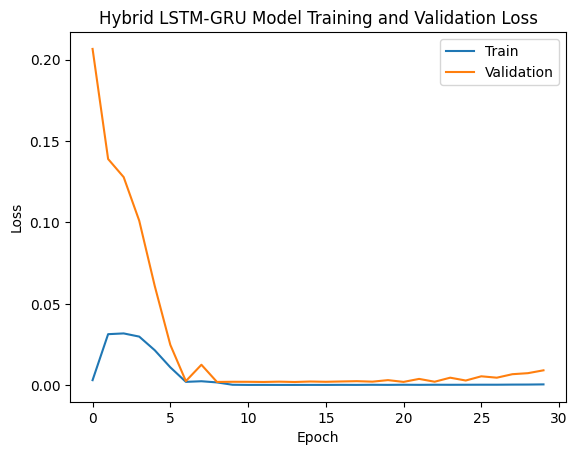

In [ ]:
# Define the hybrid GRU-LSTM model
class HybridGRULSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(HybridGRULSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.gru = nn.GRU(hidden_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        gru_out, _ = self.gru(lstm_out[:, -1, :].unsqueeze(1))  # Taking only the last output of LSTM
        out = self.fc(gru_out[:, -1, :])
        return out

# Data preparation
# Assuming you have already split your data into X_train, y_train, X_Val, y_Val, X_test, y_test

# Convert data to PyTorch tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.float32)
X_val_torch = torch.tensor(X_Val, dtype=torch.float32)
y_val_torch = torch.tensor(y_Val, dtype=torch.float32)

# Model initialization
input_size = 1  # Assuming input is univariate time series
hidden_size = 64
output_size = 1
model = HybridGRULSTM(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

# Training the model
num_epochs = 30
batch_size = 32
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    epoch_train_loss = 0.0
    model.train()
    for i in range(0, len(X_train_torch), batch_size):
        inputs = X_train_torch[i:i+batch_size]
        targets = y_train_torch[i:i+batch_size]

        # Forward pass
        outputs = model(inputs)

        # Calculate loss
        loss = criterion(outputs, targets)
        epoch_train_loss += loss.item()

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Calculate average training loss for the epoch
    train_loss = epoch_train_loss / (len(X_train_torch) / batch_size)
    train_losses.append(train_loss)

    # Validate the model
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_torch)
        val_loss = criterion(val_outputs, y_val_torch).item()
        val_losses.append(val_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

# Plotting the loss
plt.plot(range(num_epochs), train_losses, label='Train')
plt.plot(range(num_epochs), val_losses, label='Validation')
plt.title('Hybrid LSTM-GRU Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('Hybrid_LSTM_GRU_Model_Loss.png')
plt.show()

In [ ]:
# Get predictions for the validation set
model.eval()
with torch.no_grad():
    val_outputs = model(X_val_torch)
hybrid_predictions_val = val_outputs.numpy()

# Inverse transform the predictions and ground truth
hybrid_predictions_val_inv = scaler.inverse_transform(hybrid_predictions_val)
y_val_inv = scaler.inverse_transform(y_Val)

# Calculate RMSE
rmse_val = np.sqrt(mean_squared_error(y_val_inv, hybrid_predictions_val_inv))
print("Validation RMSE:", rmse_val)

# Calculate MAPE
mape_val = mean_absolute_percentage_error(y_val_inv, hybrid_predictions_val_inv)
print("Validation MAPE:", mape_val)

# Calculate MSE
mse_val = mean_square_error(y_val_inv, hybrid_predictions_val_inv)
print("Validation MSE:", mse_val)

Validation RMSE: 2.445335457721274
Validation MAPE: 2.327742578711309
Validation MSE: 5.979665500788912


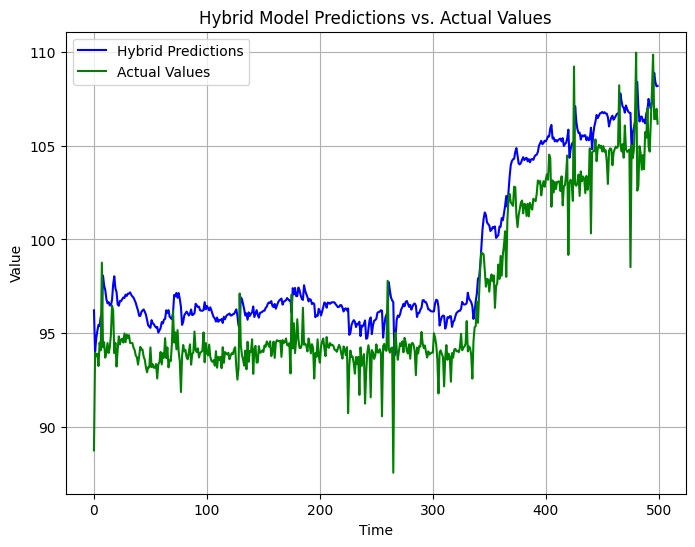

In [ ]:
x = range(len(hybrid_predictions_val))

plt.figure(figsize=(8, 6))
plt.plot(x, hybrid_predictions_val_inv, label='Hybrid Predictions', color='blue')
plt.plot(x, y_val_inv, label='Actual Values', color='green')

plt.title('Hybrid Model Predictions vs. Actual Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.savefig('Hybrid_Model_Predictions_vs_Actual_Values.png')
plt.show()

**GRU LSTM Model Testing**

In [ ]:
# Get predictions for the testing set
model.eval()
with torch.no_grad():
    test_outputs = model(torch.tensor(X_test, dtype=torch.float32))
hybrid_predictions_test = test_outputs.numpy()

# Inverse transform the predictions and ground truth
hybrid_predictions_test_inv = scaler.inverse_transform(hybrid_predictions_test)
y_test_inv = scaler.inverse_transform(y_test)

# Calculate RMSE for testing set
rmse_test = np.sqrt(mean_squared_error(y_test_inv, hybrid_predictions_test_inv))
print("Testing RMSE:", rmse_test)

# Calculate MAPE for testing set
mape_test = mean_absolute_percentage_error(y_test_inv, hybrid_predictions_test_inv)
print("Testing MAPE:", mape_test)

# Calculate MSE for testing set
mse_test = mean_square_error(y_test_inv, hybrid_predictions_test_inv)
print("Testing MSE:", mse_test)

Testing RMSE: 1.8565068986846545
Testing MAPE: 1.504410656794667
Testing MSE: 3.4466178648637142


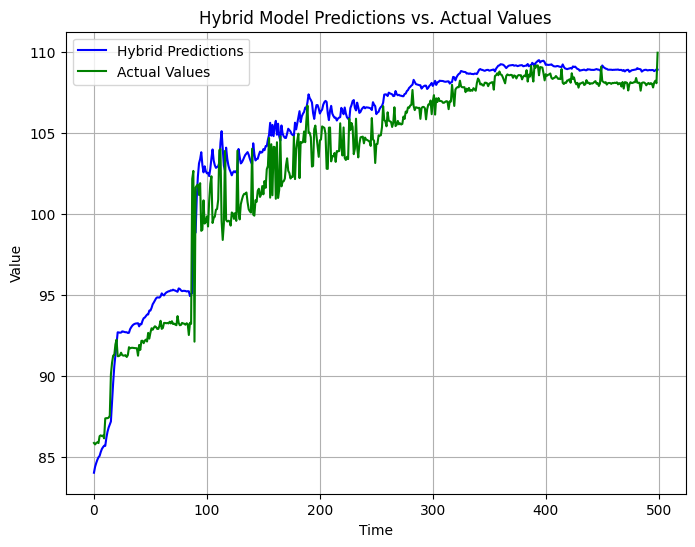

In [ ]:
x = range(len(hybrid_predictions_test))

plt.figure(figsize=(8, 6))
plt.plot(x, hybrid_predictions_test_inv, label='Hybrid Predictions', color='blue')
plt.plot(x, y_test_inv, label='Actual Values', color='green')

plt.title('Hybrid Model Predictions vs. Actual Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.savefig('Hybrid_Model_Predictions_vs_Actual_Values.png')
plt.show()

**Hybrid GRU Model Prediction**

In [ ]:
hybrid_predictions_test_inv

array([[ 84.01216 ],
       [ 84.37761 ],
       [ 84.609375],
       [ 84.8088  ],
       [ 84.964   ],
       [ 85.0526  ],
       [ 85.28771 ],
       [ 85.476105],
       [ 85.58813 ],
       [ 85.67876 ],
       [ 85.668335],
       [ 86.170784],
       [ 86.54345 ],
       [ 86.80317 ],
       [ 86.99553 ],
       [ 87.17563 ],
       [ 88.38752 ],
       [ 89.5659  ],
       [ 90.57937 ],
       [ 91.28188 ],
       [ 92.044876],
       [ 92.684326],
       [ 92.67463 ],
       [ 92.66093 ],
       [ 92.66787 ],
       [ 92.74009 ],
       [ 92.72647 ],
       [ 92.70215 ],
       [ 92.688034],
       [ 92.6882  ],
       [ 92.64029 ],
       [ 92.65619 ],
       [ 92.87794 ],
       [ 92.998764],
       [ 93.09612 ],
       [ 93.163124],
       [ 93.203026],
       [ 93.22606 ],
       [ 93.23811 ],
       [ 93.24375 ],
       [ 93.0521  ],
       [ 93.2026  ],
       [ 93.17683 ],
       [ 93.399635],
       [ 93.55336 ],
       [ 93.59432 ],
       [ 93.687355],
       [ 93.7

In [ ]:
import datetime
num_future_days = 14

lastest_date = pd.to_datetime(data['Date'].iat[-1])

# Generate the list of dates for forecast
next_14_days = [lastest_date + datetime.timedelta(days=i) for i in range(1, num_future_days + 1)]

# Print the predicted rates for the next month
for date, price in zip(next_14_days[:14], hybrid_predictions_test_inv[-14:]):
    print(f"{date.date()}: {price}")

2024-04-14: [108.8403]
2024-04-15: [108.87567]
2024-04-16: [108.89503]
2024-04-17: [108.8923]
2024-04-18: [108.857346]
2024-04-19: [108.86648]
2024-04-20: [108.88183]
2024-04-21: [108.8701]
2024-04-22: [108.88271]
2024-04-23: [108.87853]
2024-04-24: [108.81204]
2024-04-25: [108.862816]
2024-04-26: [108.91795]
2024-04-27: [108.90497]


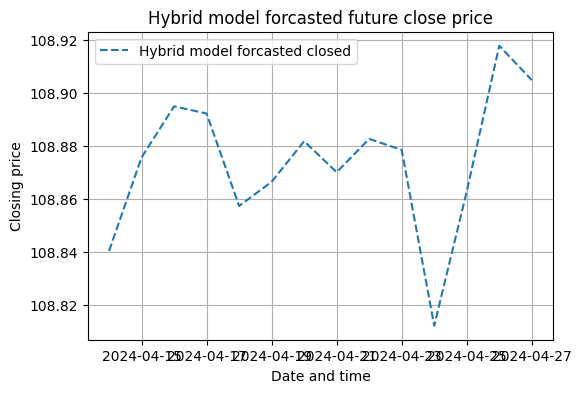

In [ ]:
plt.figure(figsize=(6,4))

plt.plot(next_14_days[:14], hybrid_predictions_test_inv[-14:], label='Hybrid model forcasted closed', linestyle='dashed')

plt.xlabel('Date and time')
plt.ylabel('Closing price')
plt.title('Hybrid model forcasted future close price')
plt.legend()
plt.grid(True)
plt.show()

**CNN model**

**Model Fitting**

Epoch [1/20], Train Loss: 0.0012
Epoch [2/20], Train Loss: 0.1714
Epoch [3/20], Train Loss: 0.0733
Epoch [4/20], Train Loss: 0.0684
Epoch [5/20], Train Loss: 0.0706
Epoch [6/20], Train Loss: 0.0721
Epoch [7/20], Train Loss: 0.0729
Epoch [8/20], Train Loss: 0.0731
Epoch [9/20], Train Loss: 0.0733
Epoch [10/20], Train Loss: 0.0733
Epoch [11/20], Train Loss: 0.0733
Epoch [12/20], Train Loss: 0.0733
Epoch [13/20], Train Loss: 0.0734
Epoch [14/20], Train Loss: 0.0734
Epoch [15/20], Train Loss: 0.0734
Epoch [16/20], Train Loss: 0.0734
Epoch [17/20], Train Loss: 0.0734
Epoch [18/20], Train Loss: 0.0734
Epoch [19/20], Train Loss: 0.0734
Epoch [20/20], Train Loss: 0.0734


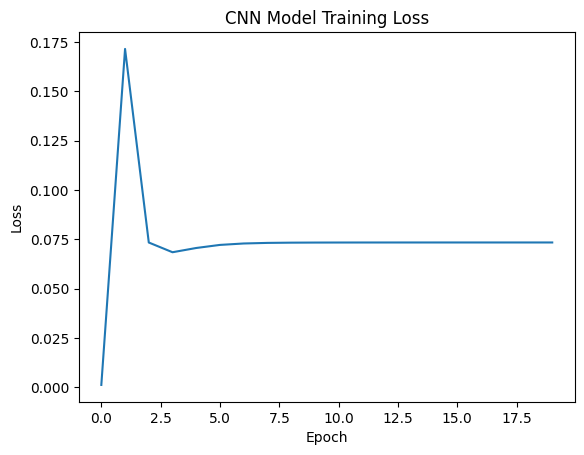

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=3)
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32 * ((step_index - 2) // 2), 64)  # Adjust the input size based on your step_index
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.pool(x)
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model
model = CNN()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

# Convert data to PyTorch tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.float32)

# Reshape the input data to match the CNN input shape [batch_size, in_channels, sequence_length]
X_train_torch = X_train_torch.permute(0, 2, 1)  # Rearrange dimensions to match Conv1d expectation

# Training loop
num_epochs = 20
batch_size = 16
train_losses = []

for epoch in range(num_epochs):
    epoch_train_loss = 0.0
    for i in range(0, len(X_train_torch), batch_size):
        inputs = X_train_torch[i:i+batch_size]
        targets = y_train_torch[i:i+batch_size]

        # Forward pass
        outputs = model(inputs)

        # Calculate loss
        loss = criterion(outputs, targets.unsqueeze(1))  # Ensure targets have the same shape as outputs
        epoch_train_loss += loss.item()

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Calculate average training loss for the epoch
    train_loss = epoch_train_loss / (len(X_train_torch) / batch_size)
    train_losses.append(train_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}')

# Plotting the loss
import matplotlib.pyplot as plt

plt.plot(range(num_epochs), train_losses)
plt.title('CNN Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## CNN Model performance in validation set

In [ ]:
# Convert validation data to PyTorch tensors
X_val_torch = torch.tensor(X_Val, dtype=torch.float32)
y_val_torch = torch.tensor(y_Val, dtype=torch.float32)

# Reshape the input data to match the CNN input shape [batch_size, in_channels, sequence_length]
X_val_torch = X_val_torch.permute(0, 2, 1)  # Rearrange dimensions to match Conv1d expectation

# Get predictions for the validation set
model.eval()
with torch.no_grad():
    val_outputs = model(X_val_torch)
cnn_predictions_val = val_outputs.numpy()

# Calculate RMSE, MSE, and MAPE for validation set
cnn_predictions_val_inv = scaler.inverse_transform(cnn_predictions_val.reshape(-1, 1)).flatten()
y_val_inv = scaler.inverse_transform(y_Val)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# Calculate RMSE for validation set
rmse_val = np.sqrt(mean_squared_error(y_val_inv, cnn_predictions_val_inv))
print("Validation RMSE:", rmse_val)

# Calculate MAPE for validation set
mape_val = mean_absolute_percentage_error(y_val_inv, cnn_predictions_val_inv)
print("Validation MAPE:", mape_val)

# Calculate MSE for validation set
mse_val = mean_squared_error(y_val_inv, cnn_predictions_val_inv)
print("Validation MSE:", mse_val)

Validation RMSE: 6.319615869688716
Validation MAPE: 0.06093023817093676
Validation MSE: 39.93754474042147


## CNN MODEL PERFORMANCE USING TEST SET

In [ ]:
# Convert test data to PyTorch tensors
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test, dtype=torch.float32)

# Reshape the input data to match the CNN input shape [batch_size, in_channels, sequence_length]
X_test_torch = X_test_torch.permute(0, 2, 1)  # Rearrange dimensions to match Conv1d expectation

# Get predictions for the test set
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_torch)
cnn_predictions_test = test_outputs.numpy()

# Calculate RMSE, MSE, and MAPE for test set
cnn_predictions_test_inv = scaler.inverse_transform(cnn_predictions_test.reshape(-1, 1)).flatten()
y_test_inv = scaler.inverse_transform(y_test)

# Calculate RMSE for test set
rmse_test = np.sqrt(mean_squared_error(y_test_inv, cnn_predictions_test_inv))
print("Test RMSE:", rmse_test)

# Calculate MAPE for test set
mape_test = mean_absolute_percentage_error(y_test_inv, cnn_predictions_test_inv)
print("Test MAPE:", mape_test)

# Calculate MSE for test set
mse_test = mean_squared_error(y_test_inv, cnn_predictions_test_inv)
print("Test MSE:", mse_test)


Test RMSE: 6.395713544211577
Test MAPE: 0.05514122069119955
Test MSE: 40.905151739611405


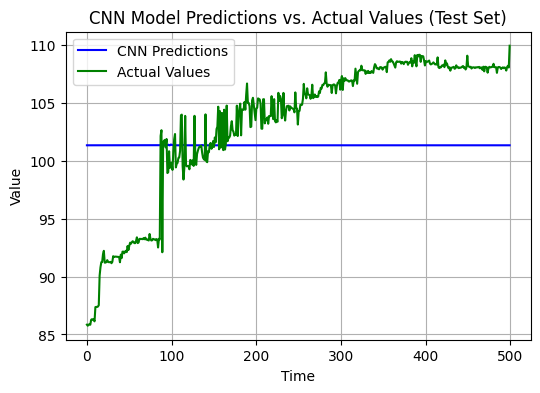

In [ ]:
# Plotting the predictions vs. actual values for the test set
x = range(len(cnn_predictions_test_inv))

plt.figure(figsize=(6, 4))
plt.plot(x, cnn_predictions_test_inv, label='CNN Predictions', color='blue')
plt.plot(x, y_test_inv, label='Actual Values', color='green')

plt.title('CNN Model Predictions vs. Actual Values (Test Set)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
cnn_predictions_test_inv

array([101.34693 , 101.34693 , 101.34693 , 101.34693 , 101.34693 ,
       101.34693 , 101.34693 , 101.34693 , 101.34693 , 101.34693 ,
       101.34693 , 101.34693 , 101.34693 , 101.34693 , 101.34693 ,
       101.34693 , 101.34693 , 101.34693 , 101.34693 , 101.34693 ,
       101.34693 , 101.34693 , 101.34693 , 101.34693 , 101.34693 ,
       101.34693 , 101.34693 , 101.34693 , 101.34693 , 101.34693 ,
       101.34693 , 101.34693 , 101.34693 , 101.34693 , 101.34693 ,
       101.34693 , 101.34693 , 101.34693 , 101.34693 , 101.34693 ,
       101.34693 , 101.34693 , 101.34693 , 101.34693 , 101.34693 ,
       101.34693 , 101.34693 , 101.34693 , 101.34693 , 101.34693 ,
       101.34693 , 101.34693 , 101.34693 , 101.34693 , 101.34693 ,
       101.34693 , 101.34693 , 101.34693 , 101.34693 , 101.34693 ,
       101.34693 , 101.34693 , 101.34693 , 101.34693 , 101.34693 ,
       101.34693 , 101.34693 , 101.34693 , 101.34693 , 101.34693 ,
       101.34693 , 101.34693 , 101.34693 , 101.34693 , 101.346

In [ ]:
import datetime
num_future_days = 14
lastest_date = pd.to_datetime(data['Date'].iat[-1])
# Generate the list of dates for forecast
next_14_days = [lastest_date + datetime.timedelta(days=i) for i in range(1, num_future_days + 1)]
# Print the predicted rates for the next month
for date, price in zip(next_14_days[:14], cnn_predictions_test_inv[-14:]):
    print(f"{date.date()}: {price}")

2024-04-14: 101.34693145751953
2024-04-15: 101.34693145751953
2024-04-16: 101.34693145751953
2024-04-17: 101.34693145751953
2024-04-18: 101.34693145751953
2024-04-19: 101.34693145751953
2024-04-20: 101.34693145751953
2024-04-21: 101.34693145751953
2024-04-22: 101.34693145751953
2024-04-23: 101.34693145751953
2024-04-24: 101.34693145751953
2024-04-25: 101.34693145751953
2024-04-26: 101.34693145751953
2024-04-27: 101.34693145751953


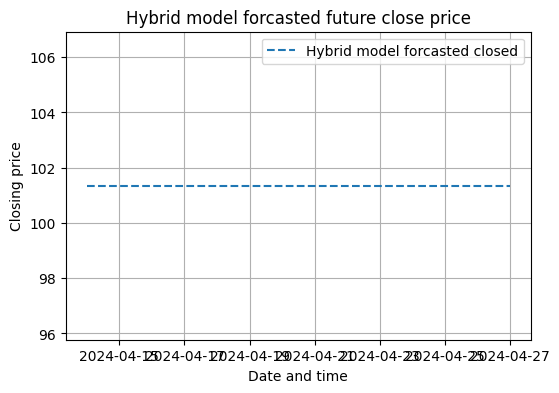

In [ ]:
plt.figure(figsize=(6,4))

plt.plot(next_14_days[:14], cnn_predictions_test_inv[-14:], label='Hybrid model forcasted closed', linestyle='dashed')

plt.xlabel('Date and time')
plt.ylabel('Closing price')
plt.title('Hybrid model forcasted future close price')
plt.legend()
plt.grid(True)
plt.savefig('EUROINR forecasting')
plt.show()